In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#import maup
from zipfile import ZipFile
import numpy as np
import os
import shutil

# State House Special Election

In [13]:
pwd

'/Users/lilyfalk/sandbox/pdv-va'

In [14]:
final = gpd.read_file('./vest_va_2016/va_2016_statehouse_special/va_2016_statehouse_special.shp')
final.head()

,COUNTYFP,LOCALITY,VTDST,PRECINCT,HOD_DIST,S16HODDEM,S16HODREP,S16HODWRI,geometry
0,095,James City County,000101,Berkeley A,093,1109,1681,14,"POLYGON Z ((-76.82290 37.23270 0.00000, -76.81..."
1,095,James City County,000201,Jamestown A,093,490,409,3,"POLYGON Z ((-76.75462 37.26158 0.00000, -76.75..."
2,095,James City County,000501,Roberts A,093,860,608,3,"POLYGON Z ((-76.65883 37.20304 0.00000, -76.64..."
3,095,James City County,000502,Roberts B,093,914,1727,6,"POLYGON Z ((-76.70027 37.24874 0.00000, -76.70..."
4,095,James City County,000503,Roberts C,093,327,194,3,"POLYGON Z ((-76.68089 37.26080 0.00000, -76.68..."


In [15]:
county_dict = pd.Series(final['COUNTYFP'].values, index = final['LOCALITY']).to_dict()

# Raw Election Results

### District 77

In [16]:
df77 = pd.read_csv('./vest_va_2016/Virginia_Elections_Database__2016_House_of_Delegates_General_Election_District_77_including_precincts.csv')

In [17]:
df77.head()

,County/City,Ward,Pct,"Clifton Eugene Hayes, Jr",All Others,Total Votes Cast
0,NaN,NaN,NaN,Democratic,NaN,NaN
1,Chesapeake City,-,3 - Camelot,"1,831",27.0,"1,858"
2,Chesapeake City,-,5 - Crestwood,"1,394",35.0,"1,429"
3,Chesapeake City,-,8 - South Norfolk Recreation,"1,405",77.0,"1,482"
4,Chesapeake City,-,10 - Oscar Smith,647,47.0,694


In [18]:
df77['County/City'].nunique()

3

In [19]:
df77.shape

(31, 6)

In [20]:
df77 = df77.iloc[1:]
df77 = df77.drop(['Ward'], axis = 1)
df77['HOD_DIST'] = '77'
column_dict = {'County/City': 'LOCALITY', 'Clifton Eugene Hayes, Jr': 'S16HODDEM', 
               'All Others': 'S16HODWRI',
              'Michael Paul Mullin': 'S16HODDEM', 'Heather Lynn Cordasco': 'S16HODREP'
              }

df77['LOCALITY'] = df77['County/City']
df77['S16HODDEM'] = df77['Clifton Eugene Hayes, Jr']
df77['S16HODWRI'] = df77['All Others']
df77 = df77.drop(['County/City', 'Clifton Eugene Hayes, Jr', 'All Others'], axis = 1)

In [21]:
df77.head()

,Pct,Total Votes Cast,HOD_DIST,LOCALITY,S16HODDEM,S16HODWRI
1,3 - Camelot,"1,858",77,Chesapeake City,"1,831",27.0
2,5 - Crestwood,"1,429",77,Chesapeake City,"1,394",35.0
3,8 - South Norfolk Recreation,"1,482",77,Chesapeake City,"1,405",77.0
4,10 - Oscar Smith,694,77,Chesapeake City,647,47.0
5,12 - Georgetown,"1,253",77,Chesapeake City,"1,217",36.0


In [22]:
df77.LOCALITY.nunique()

3

In [23]:
df77['COUNTYFP'] = df77['LOCALITY'].map(county_dict)

In [24]:
county_dict

{'James City County': '095',
 'York County': '199',
 'Chesapeake City': '550',
 'Newport News City': '700',
 'Suffolk City': '800',
 'Williamsburg City': '830'}

In [25]:
df77['LOCALITY'].value_counts()

Chesapeake City    20
Suffolk City        9
TOTALS              1
Name: LOCALITY, dtype: int64

In [26]:
df77.COUNTYFP.nunique()

2

In [27]:
df77.COUNTYFP.value_counts()

550    20
800     9
Name: COUNTYFP, dtype: int64

In [28]:
df77['S16HODDEM'] = df77['S16HODDEM'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df77['S16HODWRI'] = df77['S16HODWRI'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)

In [29]:
df77.groupby(['COUNTYFP']).sum()

,S16HODDEM,S16HODWRI
COUNTYFP,,
550,21701,793
800,5415,64


### District 93

In [30]:
df93 = pd.read_csv('./vest_va_2016/Virginia_Elections_Database__2016_House_of_Delegates_General_Election_District_93_including_precincts.csv')

In [31]:
df93.head()

,County/City,Ward,Pct,Michael Paul Mullin,Heather Lynn Cordasco,All Others,Total Votes Cast
0,NaN,NaN,NaN,Democratic,Republican,NaN,NaN
1,James City County,-,101 - Berkeley A,886,"1,383",9.0,"2,278"
2,James City County,-,104- Berkeley D,324,341,1.0,666
3,James City County,-,201 - Jamestown A,391,337,2.0,730
4,James City County,-,501 - Roberts A,687,500,2.0,"1,189"


In [32]:
print(df93['County/City'].nunique())
df93 = df93.iloc[1:]
df93['HOD_DIST'] = '93'
df93['LOCALITY'] = df93['County/City']
df93['S16HODDEM'] = df93['Michael Paul Mullin']
df93['S16HODREP'] = df93['Heather Lynn Cordasco']
df93['S16HODWRI'] = df93['All Others']
df93 = df93.drop(['County/City', 'Michael Paul Mullin', 'Heather Lynn Cordasco', 'All Others', 'Ward'], axis = 1)

df93['COUNTYFP'] = df93['LOCALITY'].map(county_dict)
print(df93['COUNTYFP'].nunique())

df93['S16HODDEM'] = df93['S16HODDEM'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df93['S16HODREP'] = df93['S16HODREP'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df93['S16HODWRI'] = df93['S16HODWRI'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)

5
4


In [33]:
df93.COUNTYFP.value_counts()

700    11
095     9
199     5
830     4
Name: COUNTYFP, dtype: int64

In [34]:
df93.LOCALITY.value_counts()

Newport News City    11
James City County     9
York County           5
Williamsburg City     4
TOTALS                1
Name: LOCALITY, dtype: int64

In [35]:
df93.groupby(['COUNTYFP']).sum()

,S16HODDEM,S16HODREP,S16HODWRI
COUNTYFP,,,
095,5296,6499,31
199,1615,3148,14
700,8641,5475,35
830,4865,2512,17


In [36]:
df93.shape

(30, 8)

In [37]:
final.HOD_DIST.value_counts()

077    25
093    21
Name: HOD_DIST, dtype: int64

## Districts 77 and 93 together

In [38]:
elections = []
elections.append(df77)
elections.append(df93)
df = pd.concat(elections, axis = 0)

df = df[df['LOCALITY'] != 'TOTALS']

df = df.reset_index()

### County vote total check

In [39]:
column_list = ['S16HODDEM', 'S16HODWRI', 'S16HODREP']

In [40]:
for val in column_list:
    vote_dif = df[val].sum()-final[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL")
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")

S16HODDEM: EQUAL
S16HODWRI: EQUAL
S16HODREP: EQUAL


In [41]:
print("Counties with differences printed below:")
diff_counties=[]
for i in column_list:
    diff = df.groupby(['COUNTYFP']).sum()[i]-final.groupby(['COUNTYFP']).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")

Counties with differences printed below:

All other races in all counties are equal


## Reallocate Absentee Votes

In [42]:
df93.COUNTYFP.value_counts()

700    11
095     9
199     5
830     4
Name: COUNTYFP, dtype: int64

In [43]:
df77.COUNTYFP.value_counts() #no overlap in counties so no need to incorporate district to reallocate

550    20
800     9
Name: COUNTYFP, dtype: int64

In [44]:
df = df.fillna(0)

In [45]:
absentee_and_prov = df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]
absentee_and_prov

,index,Pct,Total Votes Cast,HOD_DIST,LOCALITY,S16HODDEM,S16HODWRI,COUNTYFP,S16HODREP
18,19,Ab - Central Absentee Precinct,"2,939",77,Chesapeake City,2867,72,550,0.0
19,20,Provisional,16,77,Chesapeake City,16,0,550,0.0
27,28,Ab - Central Absentee Precinct,877,77,Suffolk City,868,9,800,0.0
28,29,Provisional,3,77,Suffolk City,3,0,800,0.0
36,8,Ab - Central Absentee Precinct,"2,222",93,James City County,1066,9,095,1147.0
37,9,Provisional,6,93,James City County,1,1,095,4.0
47,19,Ab - Central Absentee Precinct,"1,145",93,Newport News City,776,3,700,366.0
48,20,Provisional,13,93,Newport News City,6,0,700,7.0
51,23,Ab - Central Absentee Precinct,898,93,Williamsburg City,545,0,830,353.0
52,24,Provisional,12,93,Williamsburg City,6,0,830,6.0


In [46]:
absentee_and_prov.COUNTYFP.nunique()

6

In [47]:
df.COUNTYFP.nunique()

6

In [48]:
groupby_absentee_and_prov_tot = absentee_and_prov.groupby(['COUNTYFP']).sum()
groupby_absentee_and_prov_tot

,index,S16HODDEM,S16HODWRI,S16HODREP
COUNTYFP,,,,
095,17,1067,10,1151.0
199,57,204,2,296.0
550,39,2883,72,0.0
700,39,782,3,373.0
800,57,871,9,0.0
830,47,551,0,359.0


In [49]:
groupby_county_df_tot = df.groupby(['COUNTYFP']).sum()
df_no_absent_or_provisional = df[(df['Pct'].map(lambda x: 'Absentee' not in str(x))) & (df['Pct'].map(lambda x: 'Provisional' not in str(x)))
                                & (df['LOCALITY'] != 'TOTALS')]
groupby_county_tot_no_absentee = df_no_absent_or_provisional.groupby('COUNTYFP').sum()

In [50]:
df_with_absentee_reallocated = df_no_absent_or_provisional.copy()
groupby_absentee_and_prov_tot.reset_index(inplace=True,drop=False)
groupby_county_tot_no_absentee.reset_index(inplace=True,drop=False)

to_dole_out_totals = groupby_absentee_and_prov_tot.copy()
precinct_specific_totals = groupby_county_tot_no_absentee.copy()

## PH CODE for vote allocation

#countyfp_cd
#df_no_absent_or_provisional

#Create some new columns for each of these races to deal with the allocation
for race in column_list:
    add_var = race+"_add"
    rem_var = race+"_rem"
    floor_var = race+"_floor"
    df_with_absentee_reallocated.loc[:,add_var]=0.0
    df_with_absentee_reallocated.loc[:,rem_var]=0.0
    df_with_absentee_reallocated.loc[:,floor_var]=0.0

#Iterate over the rows
#Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
for index, row in df_no_absent_or_provisional.iterrows():
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #Grab the district
        county_id = row['COUNTYFP']
        #Get the denominator for the allocation (the precinct vote totals)
        denom = precinct_specific_totals.loc[precinct_specific_totals['COUNTYFP']==county_id][race]
        #Get one of the numerators, how many districtwide votes to allocate
        numer = to_dole_out_totals.loc[to_dole_out_totals['COUNTYFP']==county_id][race]
        #Get the vote totals for this race in this precinct
        val = df_with_absentee_reallocated.at[index,race]
        #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
        if ((float(denom)==0)):
            vote_share = 0
        else:
            vote_share = (float(val)/float(denom))*float(numer)
        df_with_absentee_reallocated.at[index,add_var] = vote_share
        #Take the decimal remainder of the allocation
        df_with_absentee_reallocated.at[index,rem_var] = vote_share%1
        #Take the floor of the allocation
        df_with_absentee_reallocated.at[index,floor_var] = np.floor(vote_share)

#After the first pass through, get the sums of the races by district to assist in the rounding            
first_allocation = pd.DataFrame(df_with_absentee_reallocated.groupby(['COUNTYFP']).sum())

#Now we want to iterate district by district to work on rounding
county_list = list(to_dole_out_totals['COUNTYFP'].unique()) 

#Iterate over the district
for county in county_list:
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
        to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals['COUNTYFP']==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
        #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
        for index in df_with_absentee_reallocated.loc[df_with_absentee_reallocated['COUNTYFP']==county][rem_var].nlargest(to_go).index:
            df_with_absentee_reallocated.at[index,add_var] = np.ceil(df_with_absentee_reallocated.at[index,add_var])

#Iterate over every race again
for race in column_list:
    add_var = race+"_add"
    #Round every allocation down to not add fractional votes
    df_with_absentee_reallocated.loc[:,add_var]=np.floor(df_with_absentee_reallocated.loc[:,add_var])
    df_with_absentee_reallocated.loc[:,race]+=df_with_absentee_reallocated.loc[:,add_var]

In [51]:
for val in column_list:
    vote_dif = df_with_absentee_reallocated[val].sum()-final[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL")
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")
        
        
print("Counties with differences printed below:")
diff_counties=[]
for i in column_list:
    diff = df_with_absentee_reallocated.groupby(['LOCALITY']).sum()[i]-final.groupby(['LOCALITY']).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")

S16HODDEM: EQUAL
S16HODWRI: EQUAL
S16HODREP: EQUAL
Counties with differences printed below:

All other races in all counties are equal


### Create unique id to enable merge

In [52]:
set(df_with_absentee_reallocated.COUNTYFP + df_with_absentee_reallocated.Pct.str.slice(stop = 3)) - set(final.COUNTYFP + final.VTDST.str.slice(start = 3))

{'55010 ',
 '55012 ',
 '55018 ',
 '55022 ',
 '55024 ',
 '55025 ',
 '55026 ',
 '55028 ',
 '55029 ',
 '5503 -',
 '55030 ',
 '55031 ',
 '55032 ',
 '55045 ',
 '55048 ',
 '5505 -',
 '55055 ',
 '5508 -',
 '8301 -',
 '8302 -'}

In [53]:
def vtdst_changer(vtdst):
    if (vtdst[1:3] == ' -'):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[1:3] == '- '):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[-1:] == ' '):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    elif (vtdst[-1:] == '-'):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    else:
        return vtdst

In [54]:
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated.Pct.str.slice(stop = 3)
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated['vtdst'].apply(vtdst_changer)
df_with_absentee_reallocated.head()

,index,Pct,Total Votes Cast,HOD_DIST,LOCALITY,S16HODDEM,S16HODWRI,COUNTYFP,S16HODREP,S16HODDEM_add,S16HODDEM_rem,S16HODDEM_floor,S16HODWRI_add,S16HODWRI_rem,S16HODWRI_floor,S16HODREP_add,S16HODREP_rem,S16HODREP_floor,vtdst
0,1,3 - Camelot,"1,858",77,Chesapeake City,2111.0,30.0,550,0.0,280.0,0.517218,280.0,3.0,0.696255,2.0,0.0,0.0,0.0,003
1,2,5 - Crestwood,"1,429",77,Chesapeake City,1608.0,38.0,550,0.0,214.0,0.566904,213.0,3.0,0.495146,3.0,0.0,0.0,0.0,005
2,3,8 - South Norfolk Recreation,"1,482",77,Chesapeake City,1620.0,85.0,550,0.0,215.0,0.252152,215.0,8.0,0.689320,7.0,0.0,0.0,0.0,008
3,4,10 - Oscar Smith,694,77,Chesapeake City,746.0,52.0,550,0.0,99.0,0.123233,99.0,5.0,0.693481,4.0,0.0,0.0,0.0,010
4,5,12 - Georgetown,"1,253",77,Chesapeake City,1403.0,39.0,550,0.0,186.0,0.449729,186.0,3.0,0.595007,3.0,0.0,0.0,0.0,012


In [55]:
df_with_absentee_reallocated['unique_id'] = df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['vtdst']
df_with_absentee_reallocated.head()

,index,Pct,Total Votes Cast,HOD_DIST,LOCALITY,S16HODDEM,S16HODWRI,COUNTYFP,S16HODREP,S16HODDEM_add,S16HODDEM_rem,S16HODDEM_floor,S16HODWRI_add,S16HODWRI_rem,S16HODWRI_floor,S16HODREP_add,S16HODREP_rem,S16HODREP_floor,vtdst,unique_id
0,1,3 - Camelot,"1,858",77,Chesapeake City,2111.0,30.0,550,0.0,280.0,0.517218,280.0,3.0,0.696255,2.0,0.0,0.0,0.0,003,550003
1,2,5 - Crestwood,"1,429",77,Chesapeake City,1608.0,38.0,550,0.0,214.0,0.566904,213.0,3.0,0.495146,3.0,0.0,0.0,0.0,005,550005
2,3,8 - South Norfolk Recreation,"1,482",77,Chesapeake City,1620.0,85.0,550,0.0,215.0,0.252152,215.0,8.0,0.689320,7.0,0.0,0.0,0.0,008,550008
3,4,10 - Oscar Smith,694,77,Chesapeake City,746.0,52.0,550,0.0,99.0,0.123233,99.0,5.0,0.693481,4.0,0.0,0.0,0.0,010,550010
4,5,12 - Georgetown,"1,253",77,Chesapeake City,1403.0,39.0,550,0.0,186.0,0.449729,186.0,3.0,0.595007,3.0,0.0,0.0,0.0,012,550012


In [56]:
final['unique_id'] = final.COUNTYFP + final.VTDST.str.slice(start = 3)

In [57]:
print(set(df_with_absentee_reallocated.unique_id) - set(final.unique_id))
print(set(final.unique_id) - set(df_with_absentee_reallocated.unique_id))

set()
set()


# Shapefile

In [58]:
county_fips = []
for directory in os.listdir('./vest_va_2016/census_shps_by_county_all_unzip/'):
    if not directory[0] == '.':
        county_fips.append(directory[-5:])
        
proj = final.crs   

county_vtds = []
for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    vtd_ref = ref + i + '/PVS_19_v2_vtd_' + i + '.shp' 
    vtd_shp = gpd.read_file(vtd_ref)
    print(i, ' added to list')
    county_vtds.append(vtd_shp)

global shp_vtd
shp_vtd = gpd.GeoDataFrame(pd.concat(county_vtds, axis = 0) , crs = proj) 

county_sldl = []
for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    sldl_ref = ref + i + '/PVS_19_v2_sldl_' + i + '.shp' #PVS_19_v2_sldl_51650
    sldl_shp = gpd.read_file(sldl_ref)
    print(i, ' added to list')
    county_sldl.append(sldl_shp)

global shp_sldl
shp_sldl = gpd.GeoDataFrame(pd.concat(county_sldl, axis = 0) , crs = proj) 

overlay = gpd.overlay(shp_sldl, shp_vtd, how='intersection', make_valid=True, keep_geom_type=True)
shp = overlay[(overlay.SLDLST == '077') | (overlay.SLDLST == '093')]

51580  added to list
51117  added to list
51121  added to list
51119  added to list
51770  added to list
51181  added to list
51175  added to list
51143  added to list
51520  added to list
51127  added to list
51740  added to list
51111  added to list
51145  added to list
51510  added to list
51187  added to list
51173  added to list
51001  added to list
51650  added to list
51037  added to list
51063  added to list
51097  added to list
51099  added to list
51009  added to list
51660  added to list
51036  added to list
51031  added to list
51007  added to list
51053  added to list
51065  added to list
51091  added to list
51047  added to list
51071  added to list
51085  added to list
51049  added to list
51620  added to list
51680  added to list
51025  added to list
51013  added to list
51810  added to list
51077  added to list
51083  added to list
51079  added to list
51610  added to list
51041  added to list
51015  added to list
51023  added to list
51820  added to list
51169  added 

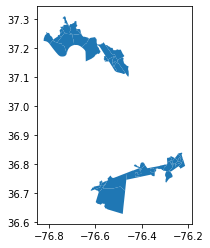

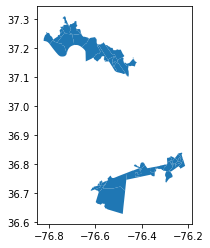

In [60]:
shp.plot()
final.plot()

In [61]:
shp.shape

(43, 42)

In [62]:
final.shape

(46, 10)

In [63]:
shp.columns

Index(['STATEFP_1', 'COUNTYFP_1', 'SLDLST', 'NAMELSAD_1', 'LSAD_1', 'PARTFLG',
       'CHNG_TYPE_1', 'EFF_DATE', 'NEW_NAME', 'NEW_CODE', 'RELTYPE1',
       'RELTYPE2', 'RELTYPE3', 'RELTYPE4', 'RELTYPE5', 'REL_ENT1', 'REL_ENT2',
       'REL_ENT3', 'REL_ENT4', 'REL_ENT5', 'RELATE_1', 'JUSTIFY_1', 'LSY',
       'NAME_1', 'VINTAGE_1', 'FUNCSTAT_1', 'STATEFP_2', 'COUNTYFP_2', 'VTDST',
       'NAMELSAD_2', 'VTDI', 'LSAD_2', 'CHNG_TYPE_2', 'ORIG_NAME', 'ORIG_CODE',
       'RELATE_2', 'NAME_2', 'VINTAGE_2', 'FUNCSTAT_2', 'JUSTIFY_2', 'MTFCC',
       'geometry'],
      dtype='object')

In [64]:
print((set(shp.COUNTYFP_1 + shp.VTDST.str.slice(start = 3)) - set(final.COUNTYFP + final.VTDST.str.slice(start = 3))))
print((set(final.COUNTYFP + final.VTDST.str.slice(start = 3)) - set(shp.COUNTYFP_1 + shp.VTDST.str.slice(start = 3))))

{'095041', '095042'}
{'700108', '800601', '199401', '095104', '700211'}


In [65]:
final[final.unique_id == '095104']

,COUNTYFP,LOCALITY,VTDST,PRECINCT,HOD_DIST,S16HODDEM,S16HODREP,S16HODWRI,geometry,unique_id
34,095,James City County,000104,Berkeley D,093,406,414,1,"MULTIPOLYGON Z (((-76.75418 37.24672 0.00000, ...",095104


In [66]:
shp['unique_id'] = shp['COUNTYFP_1'] + shp['VTDST'].str.slice(start = 3)

/Users/lilyfalk/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


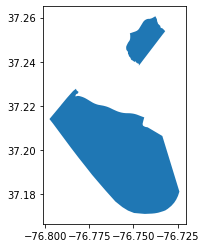

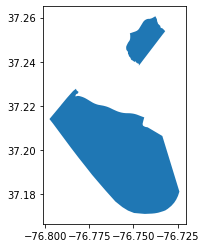

In [67]:
shp[(shp['unique_id'] == '095041') | (shp['unique_id'] == '095042')].plot()
final[final['unique_id'] == '095104'].plot()

In [68]:
id_095_dict = {'095041': '095104', '095042': '095104'}

In [69]:
shp['unique_id_1'] = shp['unique_id']
shp.loc[shp['unique_id'].isin(id_095_dict.keys()), 'unique_id'] = shp.loc[shp['unique_id'].isin(id_095_dict.keys()), 'unique_id'].map(id_095_dict)
shp.loc[shp['unique_id_1'].isin(id_095_dict.keys())]

/Users/lilyfalk/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/Users/lilyfalk/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,STATEFP_1,COUNTYFP_1,SLDLST,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_NAME,NEW_CODE,...,ORIG_CODE,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC,geometry,unique_id,unique_id_1
167,51,095,093,State House District 93,LL,Y,None,None,None,None,...,None,None,Berkeley D Part 1,90,S,None,G5240,"POLYGON Z ((-76.72393 37.18125 0.00000, -76.72...",095104,095041
1703,51,095,093,State House District 93,LL,Y,None,None,None,None,...,None,None,Berkeley D Part 2,90,S,None,G5240,"POLYGON Z ((-76.75393 37.24534 0.00000, -76.75...",095104,095042


In [70]:
shp = shp.dissolve(by = 'unique_id', as_index = False)

In [71]:
shp.loc[shp['unique_id_1'].isin(id_095_dict.keys())]

,unique_id,geometry,STATEFP_1,COUNTYFP_1,SLDLST,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,...,CHNG_TYPE_2,ORIG_NAME,ORIG_CODE,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC,unique_id_1
1,095104,"MULTIPOLYGON Z (((-76.72393 37.18125 0.00000, ...",51,095,093,State House District 93,LL,Y,None,None,...,None,None,None,None,Berkeley D Part 1,90,S,None,G5240,095041


In [72]:
print((set(shp.unique_id) - set(final.unique_id)))
print((set(final.unique_id) - set(shp.unique_id)))

set()
{'800601', '700211', '700108', '199401'}


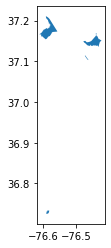

In [73]:
final[final['unique_id'].isin(['199401', '800601', '700211', '700108'])].plot()

In [74]:
set(final.unique_id) - set(df_with_absentee_reallocated.unique_id)

set()

In [75]:
final[final['unique_id'].isin(['199401', '800601', '700211', '700108'])]

,COUNTYFP,LOCALITY,VTDST,PRECINCT,HOD_DIST,S16HODDEM,S16HODREP,S16HODWRI,geometry,unique_id
7,199,York County,000401,HARWOODS MILL,093,492,1369,5,"POLYGON Z ((-76.47686 37.14917 0.00000, -76.47...",199401
27,700,Newport News City,000108,Lee Hall,093,505,283,3,"POLYGON Z ((-76.61098 37.16711 0.00000, -76.60...",700108
30,800,Suffolk City,000601,LAKESIDE,077,251,0,0,"POLYGON Z ((-76.58167 36.73342 0.00000, -76.58...",800601
45,700,Newport News City,000211,Palmer,093,86,65,1,"POLYGON Z ((-76.46814 37.11123 0.00000, -76.46...",700211


### Join election results and shapefile

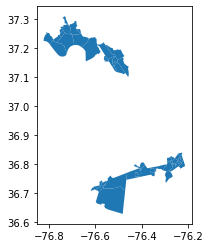

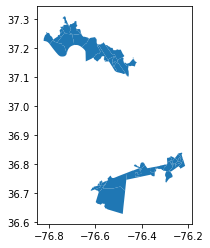

In [76]:
join = gpd.GeoDataFrame(pd.merge(df_with_absentee_reallocated, shp, on = 'unique_id', how = 'outer'), crs = proj)
join.plot()
final.plot()

In [77]:
final

,COUNTYFP,LOCALITY,VTDST,PRECINCT,HOD_DIST,S16HODDEM,S16HODREP,S16HODWRI,geometry,unique_id
0,095,James City County,000101,Berkeley A,093,1109,1681,14,"POLYGON Z ((-76.82290 37.23270 0.00000, -76.81...",095101
1,095,James City County,000201,Jamestown A,093,490,409,3,"POLYGON Z ((-76.75462 37.26158 0.00000, -76.75...",095201
2,095,James City County,000501,Roberts A,093,860,608,3,"POLYGON Z ((-76.65883 37.20304 0.00000, -76.64...",095501
3,095,James City County,000502,Roberts B,093,914,1727,6,"POLYGON Z ((-76.70027 37.24874 0.00000, -76.70...",095502
4,095,James City County,000503,Roberts C,093,327,194,3,"POLYGON Z ((-76.68089 37.26080 0.00000, -76.68...",095503
5,199,York County,000202,KILN CREEK,093,675,1011,3,"POLYGON Z ((-76.50610 37.15413 0.00000, -76.50...",199202
6,199,York County,000303,EDGEHILL,093,448,768,6,"MULTIPOLYGON Z (((-76.49125 37.19585 0.00000, ...",199303
7,199,York County,000401,HARWOODS MILL,093,492,1369,5,"POLYGON Z ((-76.47686 37.14917 0.00000, -76.47...",199401
8,550,Chesapeake City,000003,Camelot,077,2112,0,30,"POLYGON Z ((-76.36447 36.77827 0.00000, -76.36...",550003
9,550,Chesapeake City,000025,St Julians,077,728,0,53,"POLYGON Z ((-76.34550 36.77248 0.00000, -76.34...",550025


# Validation

## Validating Shapefile

Here, I merge the shp joined to the election results to the final file to compare, rather than the raw shp to final as was done is previous VA files...

In [80]:
shp_final_merge = pd.merge(join, final, on = 'unique_id', how = 'outer', suffixes = ['_x', '_y'],indicator=True)

join['geometry'].geom_almost_equals(final['geometry'], decimal = 0)

shp_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_x')
final_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_y')
vals = shp_shapes.geom_almost_equals(final_shapes, decimal = 0)

In [81]:
both = shp_final_merge[shp_final_merge["_merge"]=="both"]
source_geoms = gpd.GeoDataFrame(both,geometry="geometry_x",crs=final.crs)
vest_geoms = gpd.GeoDataFrame(both,geometry="geometry_y",crs=final.crs)
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

AttributeError: 'NoneType' object has no attribute 'is_empty'

In [82]:
count = 0
area_list = []
big_diff = pd.DataFrame(columns=["area"])
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > 1):
        count += 1
        name = source_geoms.at[i,"Pct"]
        big_diff.loc[name]=area
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

<ipython-input-82-787353f6cb91>:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area = float(diff.area/10e6)


In [83]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(46, 1)
28 precincts w/ a difference of 0 km^2
14 precincts w/ a difference between 0 and .1 km^2
0 precincts w/ a difference between .1 and .5 km^2
0 precincts w/ a difference between .5 and 1 km^2
0 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
0 precincts w/ a difference greater than 5 km^2


In [84]:
print(vals.value_counts())

True     28
False    18
dtype: int64


## Validating Election Results

In [85]:
column_list = ['S16HODDEM', 'S16HODREP', 'S16HODWRI']

In [86]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["Pct"]), "(V)","{:.>5}".format(int(df.iloc[j][right_Data]))," (S){:.>5}".format(int(df.iloc[j][left_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["Pct"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["Pct"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)

In [87]:
final_join_merge = pd.merge(join, final, on = 'unique_id', how = 'inner', suffixes = ['_x', '_y'])

In [88]:
validater_row(final_join_merge, column_list)

S16HODDEM .............................................................3 - Camelot (V) .2112  (S).2111 (D):    1
S16HODDEM ...........................................................5 - Crestwood (V) .1607  (S).1608 (D):   -1
S16HODDEM .........................................................25 - St Julians (V) ..728  (S)..729 (D):   -1
S16HODDEM .......................................................26 - Johnson Park (V) ..749  (S)..748 (D):    1
S16HODDEM ......................................................30 - South Norfolk (V) ..914  (S)..913 (D):    1
S16HODDEM ......................................................31 - Carver School (V) .1766  (S).1767 (D):   -1
S16HODDEM .........................................................32 - Providence (V) .2117  (S).2116 (D):    1
S16HODDEM ..............................................48 - Jolliff Middle School (V) .1795  (S).1796 (D):   -1
S16HODDEM ....................................................302 - John F Kennedy (V) .1489  (S